# Skaliranje kontrasta - razvlačenje kontrasta

In [1]:
from __future__ import print_function

from pylab import *
%matplotlib inline

import scipy

from ipywidgets import interact, interactive, fixed, interact_manual

import skimage #scikit-image biblioteka

from skimage import *
from skimage import io
from skimage.color import *
from skimage.exposure import *
from skimage.filters import *

import numpy as np

#plt.style.use('dark_background')

## Učitavanje slike

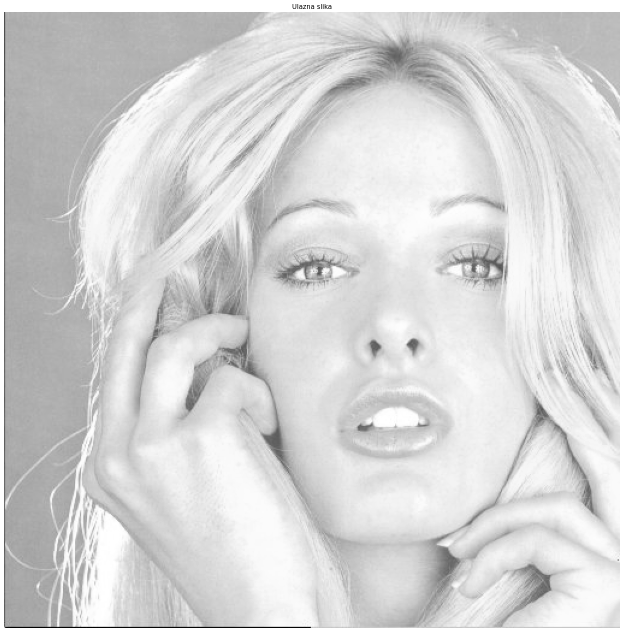

In [2]:
f = io.imread('data/tiffany_gray.tiff', plugin="tifffile")

figure(figsize=(20,20), dpi=40), imshow(f, cmap='gray', vmin=0, vmax=255)
axis('off')
title('Ulazna slika')
show()

## Histogram slike

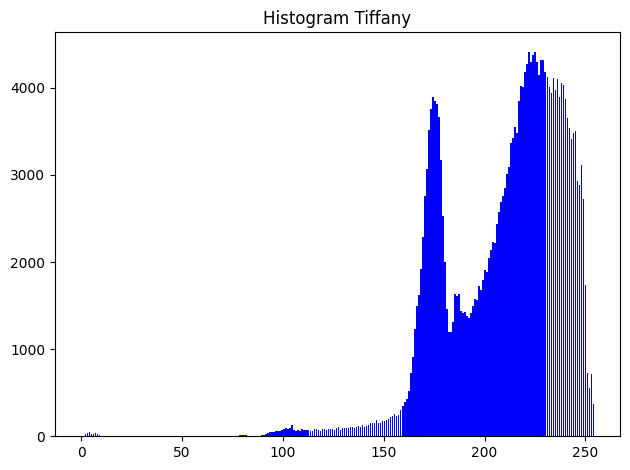

In [6]:
hist_f, bin_edges = np.histogram(f.flatten(), bins=256, range=[0,255])
plt.bar(bin_edges[0:-1], hist_f, color='b')

plt.title('Histogram Tiffany')
plt.tight_layout()
plt.show()

## Odsecanje - funkcija rescale intensity

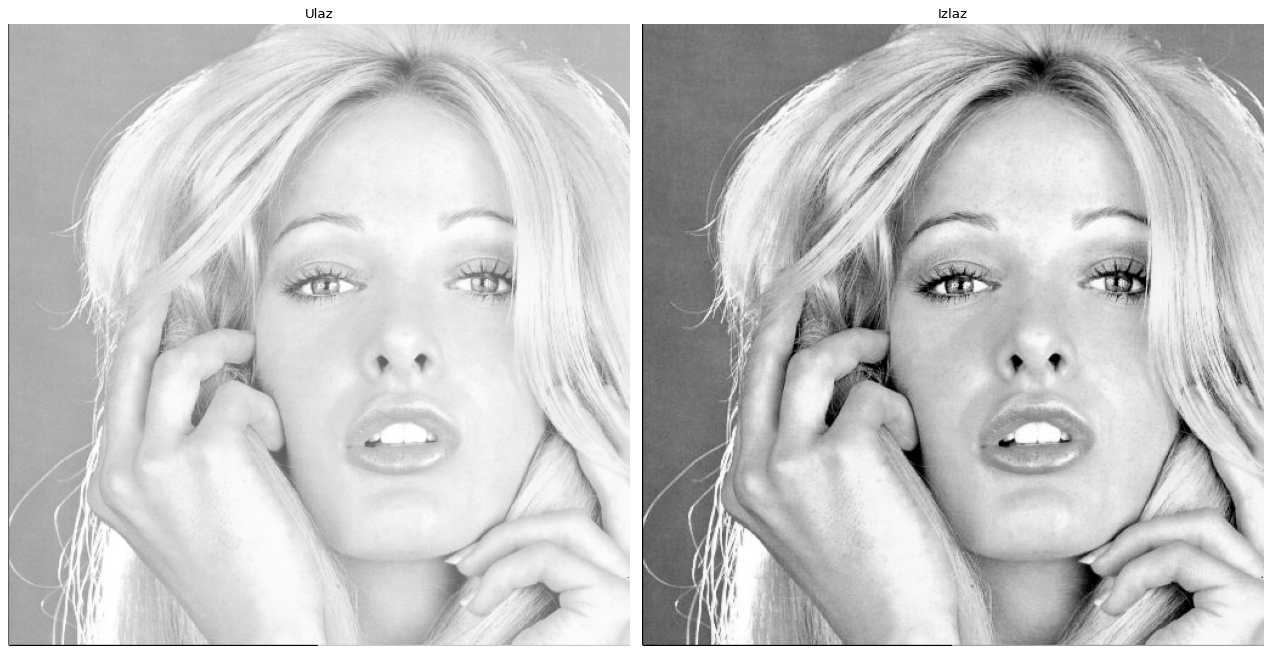

In [55]:
g = rescale_intensity(f, in_range=(110,255), out_range=(0,255))

fig, axes = plt.subplots(ncols=2, figsize=(16,11), dpi=80)
# otpakujemo ose kako bismo dodelili svaki od zasebnih plotova
ax = axes.ravel()

ax[0].imshow(f, cmap='gray')
ax[0].set_title('Ulaz')
ax[0].axis('off')

ax[1].imshow(g, cmap='gray')
ax[1].set_title('Izlaz')
ax[1].axis('off')

fig.tight_layout()
plt.show()

### Histogram pre i posle

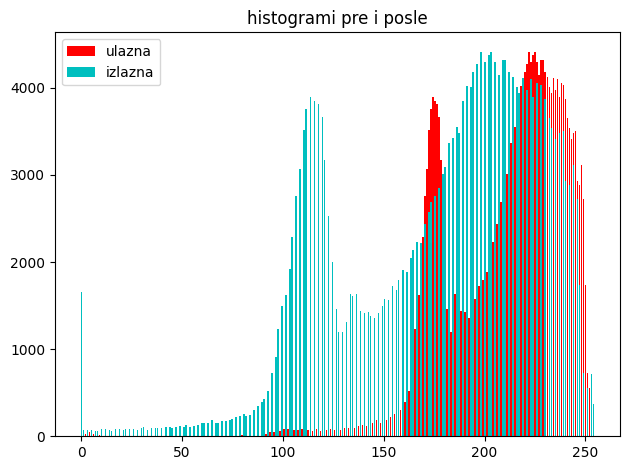

In [56]:
hist_f, bin_edges = np.histogram(f.flatten(), bins=256, range=[0,255])
hist_g, bin_edges = np.histogram(g.flatten(), bins=256, range=[0,255])

# kod plotovanja histograma iako ima bin_edges 0-255, zapravo treba da ima 255 barova pa je onda [0:-1]
plt.bar(bin_edges[0:-1], hist_f, color='r')
plt.bar(bin_edges[0:-1], hist_g, color='c')

plt.title('histogrami pre i posle')
plt.tight_layout()
plt.legend(['ulazna', 'izlazna'])
plt.show()

## Funkcija za razvlacenje histograma

In [57]:
def razvlacenje_histograma(f, in_min=0, in_max=255):
    g = rescale_intensity(f, in_range=(in_min, in_max), out_range=(0,255))
    
    hist, bin_edges = np.histogram(g.flatten(), bins=256, range=(0,255))
    
    fig, ax = plt.subplots(ncols=2, figsize=(24,8), dpi=80)
    fig.tight_layout()
    
    ax[0].imshow(g, cmap='gray', vmin=0, vmax=255)
    ax[0].set_title('Izlazna slika')
    ax[0].axis('off')
    
    ax[1].bar(bin_edges[0:-1], hist)
    ax[1].set_title('Histogram izlazne slike')
    
    return

In [58]:
interact(razvlacenje_histograma, f=fixed(f), in_min=(0,255), in_max=(0,255))

interactive(children=(IntSlider(value=0, description='in_min', max=255), IntSlider(value=255, description='in_…

<function __main__.razvlacenje_histograma(f, in_min=0, in_max=255)>

### Razvlacenje kontrasta do minimuma i maksimuma opsega

0 255


(-0.5, 511.5, 511.5, -0.5)

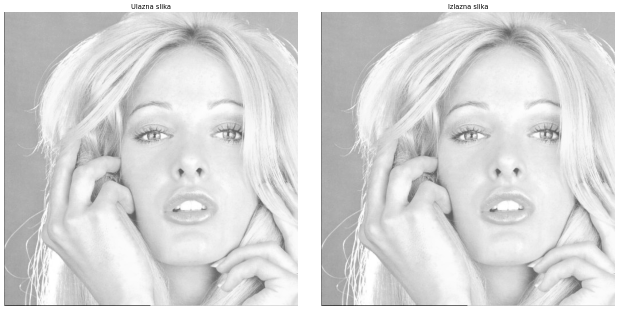

In [59]:
# TODO pronaći minimum i maksimum vrednosti slike i njih iskoristiti za razvlacenje na pun opseg
low_in = min(f.flatten())
high_in = max(f.flatten())
print(low_in, high_in)

g_min_max = rescale_intensity(f, in_range=(low_in, high_in), out_range=(0,255))

fig, ax = plt.subplots(ncols=2, figsize=(16, 10), dpi=40)
fig.tight_layout()

ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Ulazna slika')
ax[0].axis('off')

ax[1].imshow(g_min_max, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Izlazna slika')
ax[1].axis('off')

## poredjenje sa pragom

(-0.5, 2825.5, 1255.5, -0.5)

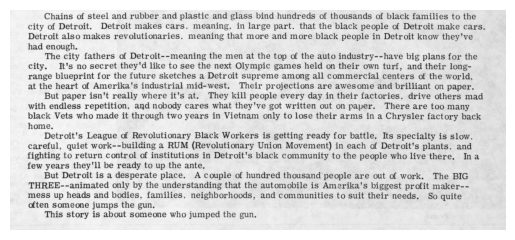

In [91]:
f = rgb2gray(imread('data/text.jpg'))
imshow(f, cmap='gray')
axis('off')

In [92]:
# TODO napisati funkciju koja vrsi binarizaciju slike prema zadatom pragu i iscrtava origanlnu sliku i binarozovanu sliku jednu pored druge
def image_binarization(f, t=0.5):
    # jedinice svuda gde je vrednost slike veca od praga t, nule gde je manja
    g = f>t
    
    
    fig, ax = plt.subplots(ncols=2, figsize=(24, 8), dpi=80)
    fig.tight_layout()

    ax[0].imshow(f, cmap='gray', vmin=0, vmax=1)
    ax[0].set_title('Ulazna slika')
    ax[0].axis('off')
    
    ax[1].imshow(g, cmap='gray', vmin=0, vmax=1)
    ax[1].set_title('Binarizovana slika')
    ax[1].axis('off')
    plt.show()
    
    return

In [93]:
interactive(image_binarization, f=fixed(f), t = (0,1, 0.01))

interactive(children=(FloatSlider(value=0.5, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

In [95]:
img1 = rgb2gray(imread('data/text1.png'))
interactive(image_binarization, f=fixed(img1), t = (0,1, 0.01))

interactive(children=(FloatSlider(value=0.5, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

## Izdvajanje regiona određene sjajnosti

(-0.5, 719.5, 827.5, -0.5)

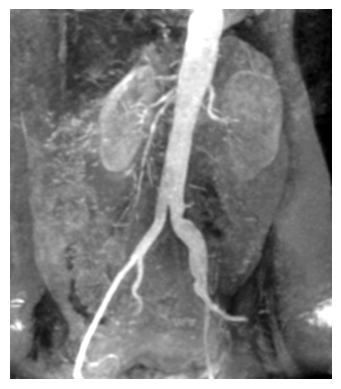

In [98]:
image = io.imread('data/kidney.tif', plugin="tifffile")
imshow(image, cmap='gray')
axis('off')

(-0.5, 719.5, 827.5, -0.5)

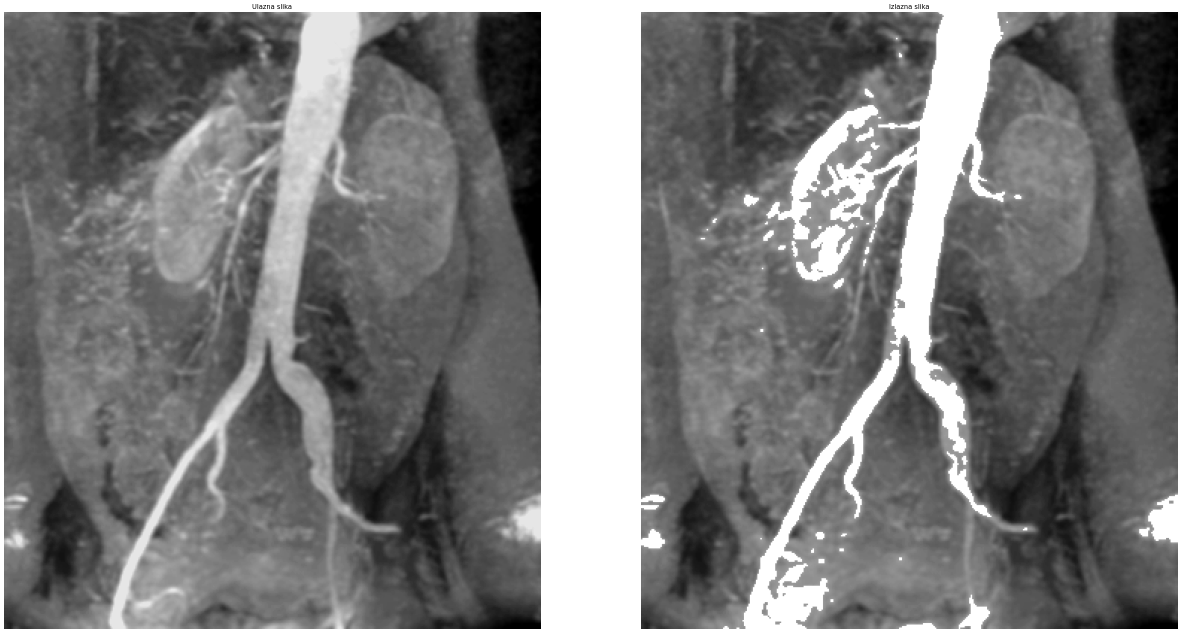

In [64]:
# TODO postaviti vrednost piksela koje pripadaju nekom zadatom opsegu na mksimum, odnosno 255

low_in = 155
high_in = 235

g_region = np.copy(image)
g_region[(g_region>low_in) & (g_region<high_in)] = 255

fig, ax = plt.subplots(ncols=2, figsize=(32, 16), dpi=40)
fig.tight_layout()

ax[0].imshow(image, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Ulazna slika')
ax[0].axis('off')

ax[1].imshow(g_region, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Izlazna slika')
ax[1].axis('off')

## Logaritamska i stepena transformacija slike

### Logaritamska

In [2]:
import imageio
from imageio.plugins import freeimage
# ako ne radi treba pokrenuti sledeci download
imageio.plugins.freeimage.download()

Imageio: 'freeimage-3.18.0-win64.dll' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/freeimage/FreeImage-3.18.0-win64.dll (6.6 MB)
Downloading: 8192/6942208 bytes (0.1%303104/6942208 bytes (4.4%827392/6942208 bytes (11.91171456/6942208 bytes (16.9%1531904/6942208 bytes (22.1%1859584/6942208 bytes (26.8%2400256/6942208 bytes (34.6%2678784/6942208 bytes (38.6%3022848/6942208 bytes (43.5%3530752/6942208 bytes (50.9%5267456/6942208 bytes (75.9%5742592/6942208 bytes (82.7%6397952/6942208 bytes (92.2%6938624/6942208 bytes (99.9%6942208/6942208 bytes (100.0%)
  Done
File saved as C:\Users\jana\AppData\Local\imageio\freeimage\freeimage-3.18.0-win64.dll.


In [10]:
f = imageio.imread('./data/belgium.png')#, format='HDR-FI')
f = f/max(f.flatten())

imshow(f)

C:\Users\jana\AppData\Local\Temp\ipykernel_5444\2075128106.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  f = imageio.imread('./data/belgium.png')#, format='HDR-FI')


FileNotFoundError: No such file: 'c:\Users\jana\Documents\Jana Mitrović\Ostalo\PFE\Prolecni\predavanja\data\belgium.png'

In [121]:
def log_transform(img, c):
    img_out = log(1 + (10**c)*img)/log(1+10**c)
    plt.figure(figsize=(32,20))
    axis('off')
    imshow(img_out)

In [122]:
interact(log_transform, img=fixed(f), c=(0,10,0.2))

interactive(children=(FloatSlider(value=5.0, description='c', max=10.0, step=0.2), Output()), _dom_classes=('w…

<function __main__.log_transform(img, c)>

### Stepena

In [71]:
# Napisati funkciju koja realizuje stepenu kompresiju kontrasta slike

def exp_transform(img, c, k):
    img_out = c*img**k

    #zaboravi da napises ovaj deo
    img_out[img_out > 1] = 1 
    img_out[img_out < 0] = 0
    
    plt.figure(figsize=(32,20))
    axis('off')
    imshow(img_out)

In [72]:
interact(exp_transform, img=fixed(f), c=(0,5,0.1), k=(0,1,0.05))

interactive(children=(FloatSlider(value=2.0, description='c', max=5.0), FloatSlider(value=0.0, description='k'…

<function __main__.exp_transform(img, c, k)>

### Funkcija za iscrtavanje slike i histograma

In [1]:
def plot_img_and_hist(image, axes, bins=256):
    # ne znamo koji je format slike pa skaliramo za svaki slucaj
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()
    
    # iscrtavanje
    ax_img.imshow(image, cmap='gray', vmin=0, vmax=1), ax_img.set_axis_off()
    
    # iscrtavanje histograma
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='blue')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    ax_hist.set_xlabel('Intenzitet piksela')
    ax_hist.set_xlim(0,1)
    ax_hist.set_yticks([])
    
    # iscrtavanje kumulativnog histograma
    img_cdf, bins = cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])
    
    return ax_img, ax_hist, ax_cdf

# Ekvalizacija histograma

In [10]:
# ucitavanje ulazne slike
img=cv2.imread('data/dark.tif')
plt.figure(figsize=(20,20), dpi=40), imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Ulazna slika')
plt.axis('off')
plt.show()

NameError: name 'plt' is not defined

In [8]:
import scipy 
from scipy import io
import cv2

In [11]:
#Ekvalizacija histograma
img_eq =equalize_hist(img)
figure(figsize=(20,20), dpi=40), imshow(img_eq, cmap='gray', vmin=0, vmax=1)
plt.title('Slika nakon ekvalizacije')
plt.axis('off')
plt.show()

NameError: name 'equalize_hist' is not defined

# Specifikacija histograma

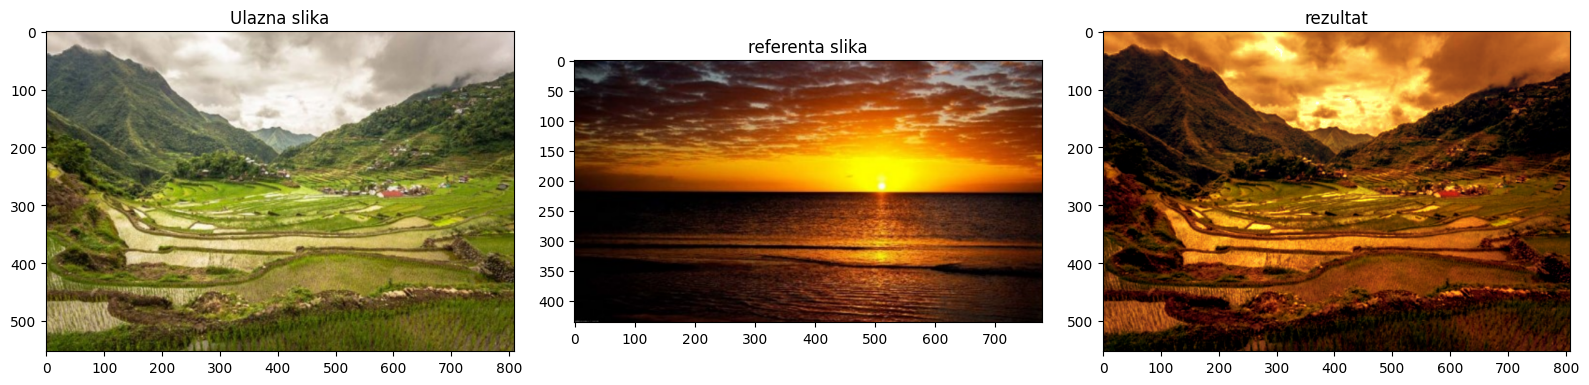

In [128]:
ref= imread('data/sunset.png') # slika sa koje uzimamo histogram
img = imread('data/landscape.png') # slika koju menjamo

img_histmatch = match_histograms(img, ref, channel_axis=-1)

fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

# for i in range(0,3):
#     ax[i].set_axis_off()
    
ax[0].imshow(img) 
ax[0].set_title('Ulazna slika')

ax[1].imshow(ref)
ax[1].set_title('referenta slika')

ax[2].imshow(img_histmatch)
ax[2].set_title('rezultat')

#plt.tight_layout()
plt.show()

Prikaz histograma i kumulativnih histograma

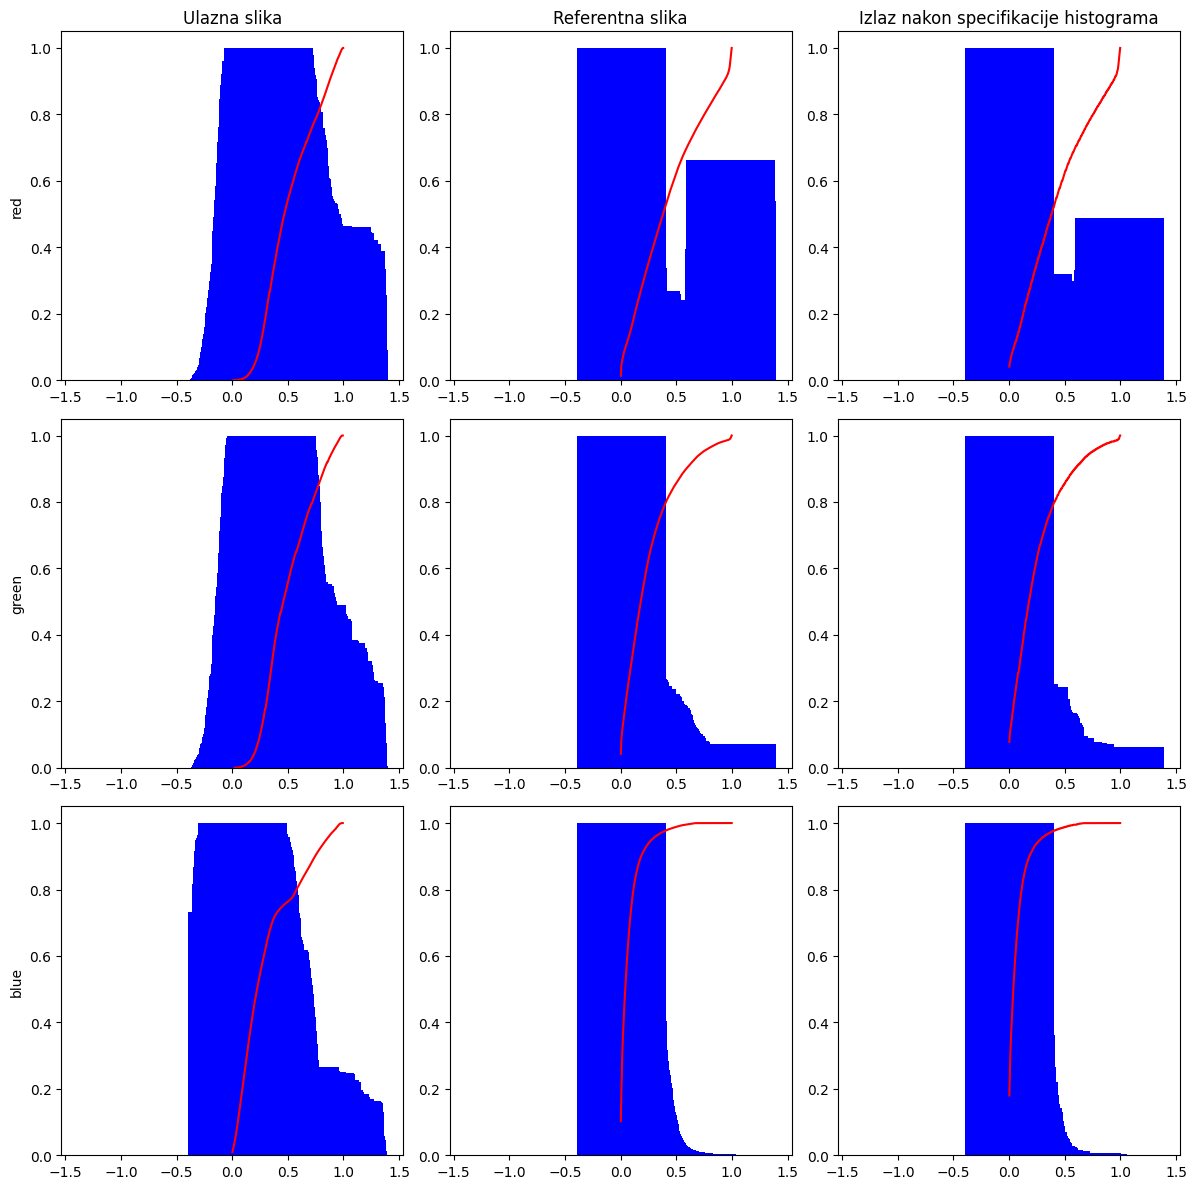

In [107]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,12))

for i, image in enumerate((img, ref, img_histmatch)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = histogram(image[..., c], source_range='dtype')
        axes[c,i].bar(bins, img_hist/img_hist.max(), color='blue')
        img_cdf, bins = cumulative_distribution(image[..., c])
        axes[c,i].plot(bins, img_cdf, 'r')
        axes[c,0].set_ylabel(c_color)
        
axes[0,0].set_title('Ulazna slika')
axes[0,1].set_title('Referentna slika')
axes[0,2].set_title('Izlaz nakon specifikacije histograma')


plt.tight_layout()
plt.show()